# Linear Regression I

This guide is a very simple implementation for a linear regression predition problem. In other words, we will be using the *gradient descent algorithim* to predict the regression coefficients (or *features* in ML terminology). This guide is based on a Medium [post](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931) written by [Adarsh Menon](https://www.youtube.com/adarshmenon), and will serve as a building block for more complicated versions of this model.

Here's a sketch of what we'll be doing:
- **Creating a synthetic dataset** <br> 
Here we will define some "ground-truth parameters" (namely the slope and error/bias terms) to build an artificial dataset 

- **Define the model** <br>
The model relates the input and parameters to the output. In our simple case, we will be trying to find the output $y$ using the classic slope equation $y = mx+ b$.

- **Define the loss function**<br>
The loss function is an algorithim that tell us how well our predictions is doing — in essence a "rule of thumb" that computes the distance between the prediction and "true" expected output. Here we will be suing the mean squared error equation as our rule of thumb.

- **Training the model**<br>
This is the part where we make predictions, and iteratively make changes to our parameter predictions so that it gets closer and closer to the "ground-truth". To do so we:
    - Initialize parameters (slope $m$ and bias term $b$)
    - Repeat until done:
        - Compute the gradient (i.e., the derivative of the loss function w.r.t parameters)
        - Update our parameters
    


### Creating Synthetic Dataset, Defining the Model

Here, we will define the "ground-truth" parameters:
- Slope: $m$ = 0.5
- Error/Bias Term: $c \sim \mathcal{N}(0, 0.1)$

In [16]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# Creating an artifical dataset
X = np.random.normal(0,1, 1000)
c = np.random.normal(0, 0.1, 1000)
m = 0.5

#Defining the model
y = m*X + c

It's always a good habit to check and make sure that the dimensions of our synthetic dataset are correct. 

In [17]:
print('The dimensions for X are:', X.shape)
print('The dimensions for Y are:', y.shape)

The dimensions for X are: (1000,)
The dimensions for Y are: (1000,)


We can also display this in a scatterplot.

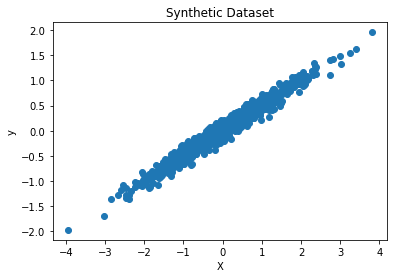

In [18]:
plt.title("Synthetic Dataset");
plt.scatter(X,y);
plt.xlabel("X");
plt.ylabel("y");

### Defining the loss function

The loss function is given by the mean squared error equation, which is:

$E = \frac{1}{n}\sum\limits_{i=0}^{n}(y_i-\hat{y_i})^2$

where $\hat{y_i}$ represents our predicted output. Recall from calculus that we take the gradient to find the direction of steepest ascent. Thus, to minimize the loss function (which is to find the local minimum), we take the negative partial derivative of our loss function with respect to the parameters.

$D_m = \frac{-2}{n}\sum\limits_{i=0}^{n}x_i(y_i-\hat{y_i})$<br>
$D_c = \frac{-2}{n}\sum\limits_{i=0}^{n}(y_i-\hat{y_i})$

### Training the model 

Before we train the model, we should also define some terminologies. An **epoch** is defined as one complete pass of the training dataset through the algorithim (e.g., if the dataset has 1000 rows of inputs, that means going through all 1000 inputs once). The **learning rate** is the step size of each iteration that is moving towards the minimum of a loss function; the smaller the "step size", the more precise our adjustments will be (but also computationally tiring).

In [25]:
# Initializing value
m_pred = 0
c_pred = 0

L = 0.001 # Learning Rate
epochs = 5000 # Try adjusting this parameter: if this value is too small, you won't get a good result 
n = float(len(X))

for i in range(epochs):
  y_pred = m_pred * X + c_pred
  D_m = (-2/n) * sum(X * (y - y_pred)) # Differentiated Loss function
  D_c = (-2/n) * sum(y - y_pred) # Differentiated Loss Function
  m_pred = m_pred - L * D_m # Update m
  c_pred = c_pred - L * D_c # Update c
  #print(m_pred, c_pred) # Uncomment this to see the predictions that is made every epoch

print('Predicted m:', m_pred,' Predicted c:', c_pred)

Predicted m: 0.49925294744052695  Predicted c: 0.008160873811654841


Let's display the equation of our prediction.

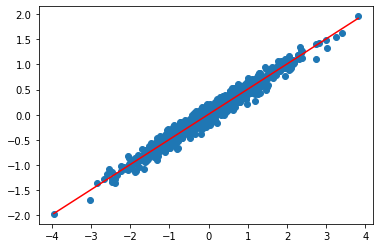

In [26]:
# Making predictions 
y_pred = m_pred * X + c_pred # Predicted Regression line
plt.scatter(X,y) # Scatterplot of original Data
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')  # Displaying predicted Regression line
plt.show()